# Temperatura ambiente: GaSb

Variabili:
- tempo della singola acquisizione [0e1, 0e5, 0e9, 0e25]
- numero di prese dati [1, 2, 3, 5, 8, 15]
- filtro utilizzato [0e01pc, 0e05pc, 0e1pc, ...]
- fenditura

Fissi:
- 300K
- 35lmm (grating)
- .asc (formato file)
- 1064nm (lambda laser eccitazione)

## Importazioni

In [423]:
from qp2_subroutines import *
import os

In [424]:
os.getcwd() 

'/Users/zosojack/lab-ss/QP2'

## Preliminari

In [425]:
def escludi_picchi_spuri (counts, n_picchi_da_rimuovere=1):

    # calcolo media (che sarà maggiore/minore del normale a causa dei picchi spuri)
    media  = np.mean(counts)
    if media > 0: 
        for j in range(n_picchi_da_rimuovere):

            # prendo il massimo 
            i_max = np.argmax(counts)
            # escludo regione dei counts attorno al massimo che differisce da media per più di 1sigma
            i_inf = i_max
            while i_inf > 0 and counts[i_inf]>media:
                i_inf -= 1
            
            i_sup = i_max
            while i_sup < len(counts) - 1 and counts[i_sup]>media:
                i_sup += 1
            
            counts = np.concatenate((counts[:i_inf], counts[i_sup+1:]))
            
            # ri-calcolo media 
            media  = np.mean(counts)
            
    # se la media è minore di zero, elimino i picchi negativi
    else:
        for j in range(n_picchi_da_rimuovere):
            
            # prendo il minimo 
            i_min = np.argmin(counts)
            # escludo regione dei counts attorno al massimo che differisce da media per più di 1sigma
            i_inf = i_min
            while i_inf > 0 and counts[i_inf]<media:
                i_inf -= 1
            
            i_sup = i_min
            while i_sup < len(counts) - 1 and counts[i_sup]<media:
                i_sup += 1
            
            counts = np.concatenate((counts[:i_inf], counts[i_sup+1:]))
            
            # ri-calcolo media 
            media  = np.mean(counts)
        
    return counts

In [426]:
def trasla_counts (waveln, counts):
    mask = (waveln < 1400) 
    help = counts[mask]
    
    help2 = escludi_picchi_spuri(help, n_picchi_da_rimuovere=5)
    
    media  = np.mean(help2)
    dev = np.std(help)

    if media>0:
        return counts - abs(media), dev
    elif media<0:
        return counts + abs(media), dev
    else:
        return counts, dev

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Analisi

In [427]:
arr_filtri_GaSb = ['0e01pc', '0e0125pc', '0e05pc', '0e1pc', '0e5pc', '1pc', '2e5pc', '5pc']

In [428]:
def build_name_GaSb (filtro: str, T='300K', lmm='35lmm'):
    # t_acq == 0e1
    # n_acq == 5
    # grating == 35lmm
    # ecc=None, fen=None
    
    cartella = 'data/T_room_300K_pGe_e_GaSb/'
    name = 'Giak_' + '0e1_5_' + T + '_' + filtro + '_GaSb_35lmm.asc'
    
    return cartella+name

## GaSb su INTENSITÀ

#### Contenitore per i dati

In [429]:
# dictionary GaSb
# le keys saranno i filtri
# ciascuna key conterrà le due colonne del file:
# GaSb[filtro][0] - colonna 0 del file (lunghezze d'onda)
# GaSb[filtro][1] - colonna 1 del file (counts)

GaSb = {}

# dictionary rumore
# le keys sono i filtri
# ciascuna key contiene la deviazione standard della regione iniziale del plot, che stima il rumore
 
rumore = {}

#### Lettura file

In [430]:
lista_dei_massimi = []

In [431]:
for filtro in arr_filtri_GaSb:
    
    # Costruisco nome file
    name = build_name_GaSb (filtro=filtro)
    # Estraggo i dati 
    waveln, counts = leggi_file_asc (name)
    # PRE-pulisco i counts da valori insensati nelle regioni esterne
    counts = pre_clean_counts (counts, n_primi=90, n_ultimi=180, rep=10)
    # Pulisco i counts da valori insensati
    counts = clean_counts (counts, n=1, peak=True)
    # Traslo i counts in modo che partano da 0
    counts, dev = trasla_counts (waveln, counts)
    
    # Raccolgo
    GaSb[filtro] = (waveln, counts)
    rumore[filtro] = dev
    
    # prendo il massimo e lo metto nella lista dei massimi
    lista_dei_massimi.append(np.max(counts))

In [432]:
# estraggo il massimo conteggio fra tutti i grafici
conteggio_massimo_assoluto = np.max(np.array(lista_dei_massimi))

### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -  - - - - -

#### Plot + Fit Gauss

In [433]:
n_acq = 4
lista_SNR = []

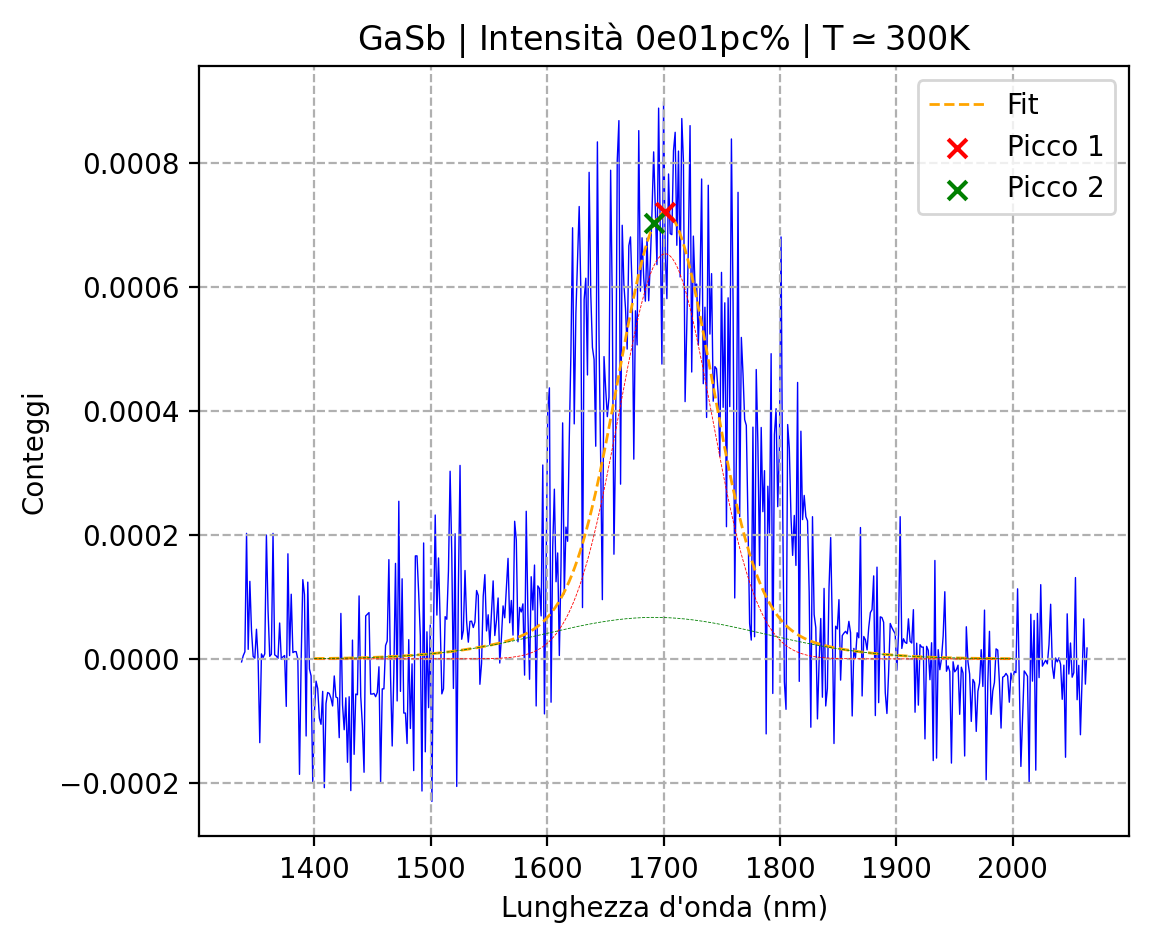

• Gaussiana  1
 - A = 0.0006529516607441672
 - mu = 1701.4290681197824
 - sigma = 39.71751095625548
• Gaussiana  2
 - A = 6.690510612649999e-05
 - mu = 1692.0876155104463
 - sigma = 93.76134537384463
 - chi2rid = 22807.907707572067
SNR = 86.43686690329768


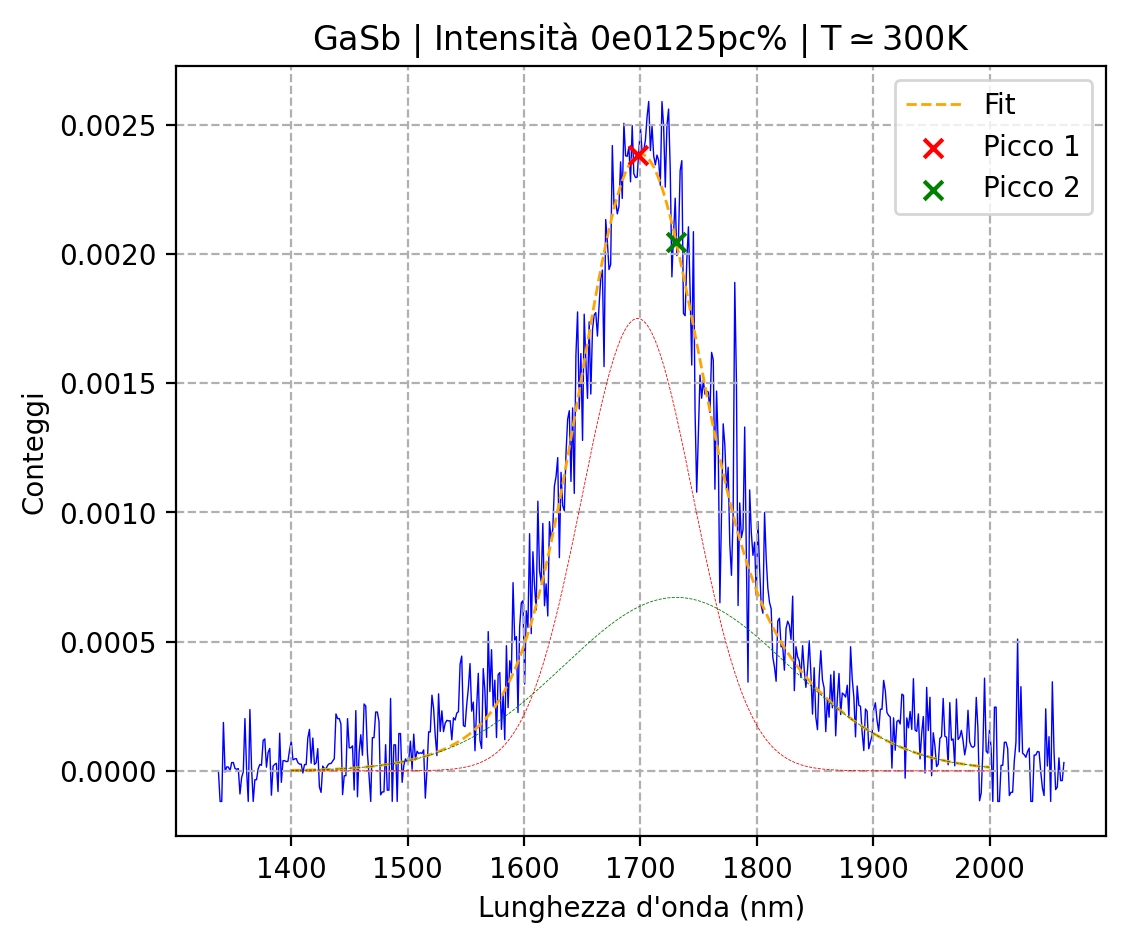

• Gaussiana  1
 - A = 0.0017505463644401145
 - mu = 1697.5680390449647
 - sigma = 47.75578459875724
• Gaussiana  2
 - A = 0.0006712004177883816
 - mu = 1730.7737264781
 - sigma = 96.62759353105689
 - chi2rid = 15531.912222114479
SNR = 957.3759174461569


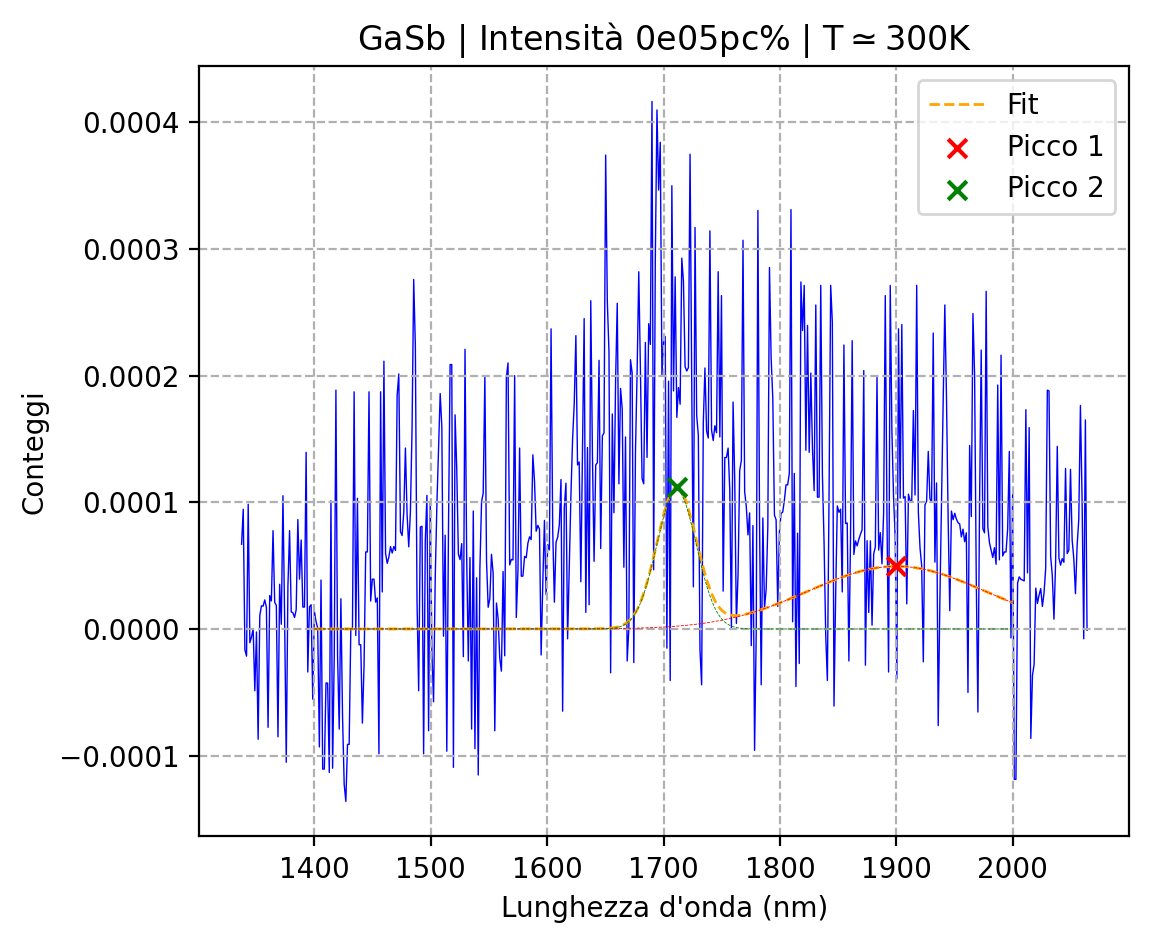

• Gaussiana  1
 - A = 4.945195165367701e-05
 - mu = 1899.9999999999995
 - sigma = 75.62160925955736
• Gaussiana  2
 - A = 0.00010977129061958562
 - mu = 1711.1357664128511
 - sigma = 16.913400286674676
 - chi2rid = 23360.744020209317
SNR = 17.634407212160898


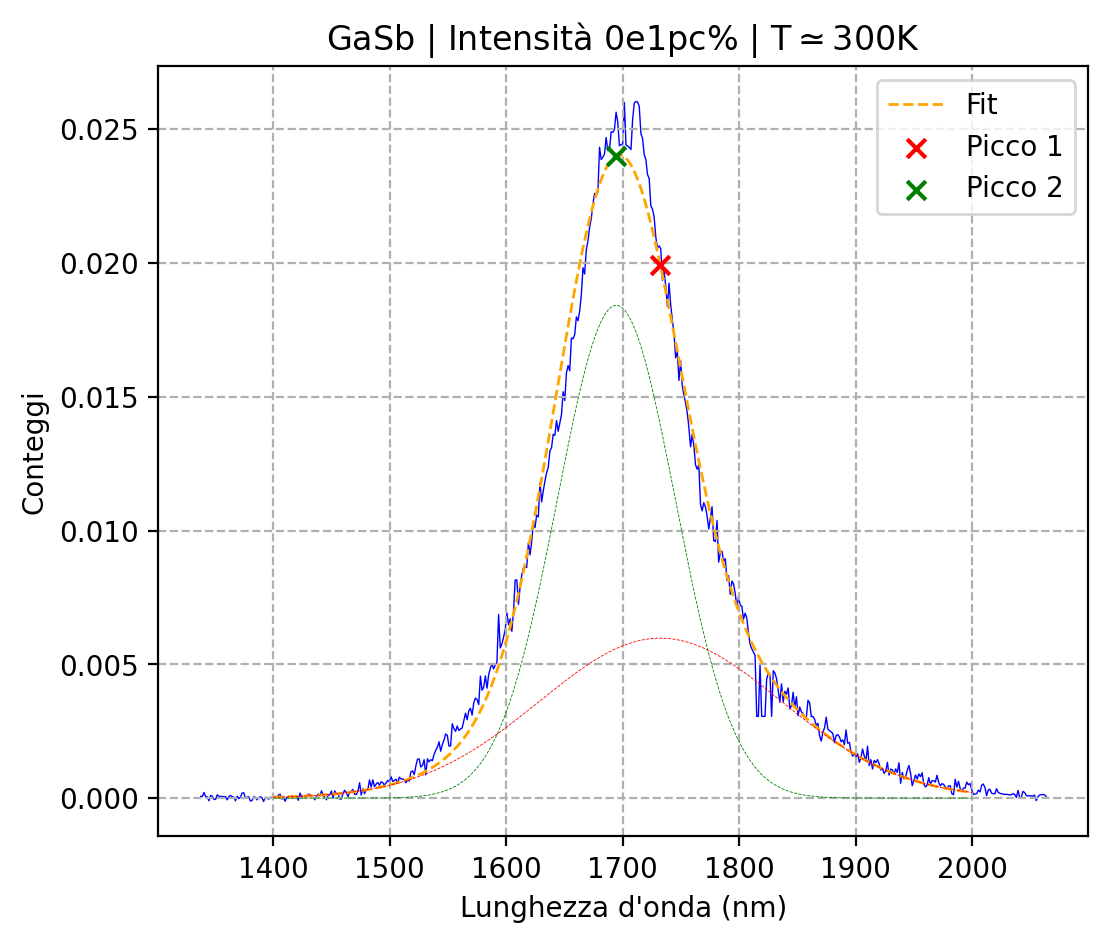

• Gaussiana  1
 - A = 0.005977564980256118
 - mu = 1732.3767758576564
 - sigma = 103.687097910678
• Gaussiana  2
 - A = 0.018416477207421154
 - mu = 1694.5335100922478
 - sigma = 50.6375311159917
 - chi2rid = 23500.864476397393
SNR = 111854.98977791982


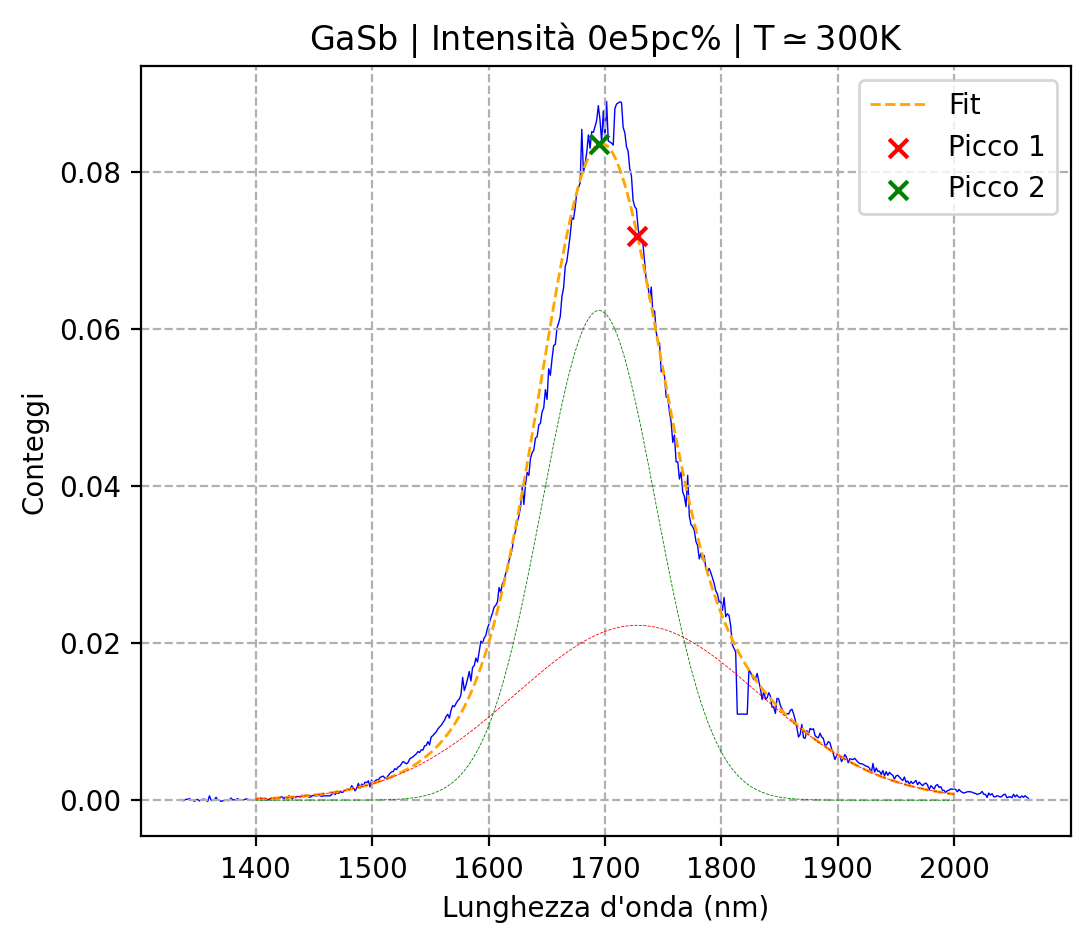

• Gaussiana  1
 - A = 0.02227282923425224
 - mu = 1727.9295134058198
 - sigma = 104.69462884528201
• Gaussiana  2
 - A = 0.06236456683611535
 - mu = 1694.8754308851417
 - sigma = 48.793584844639824
 - chi2rid = 65137.32358768886
SNR = 437354.15695959085


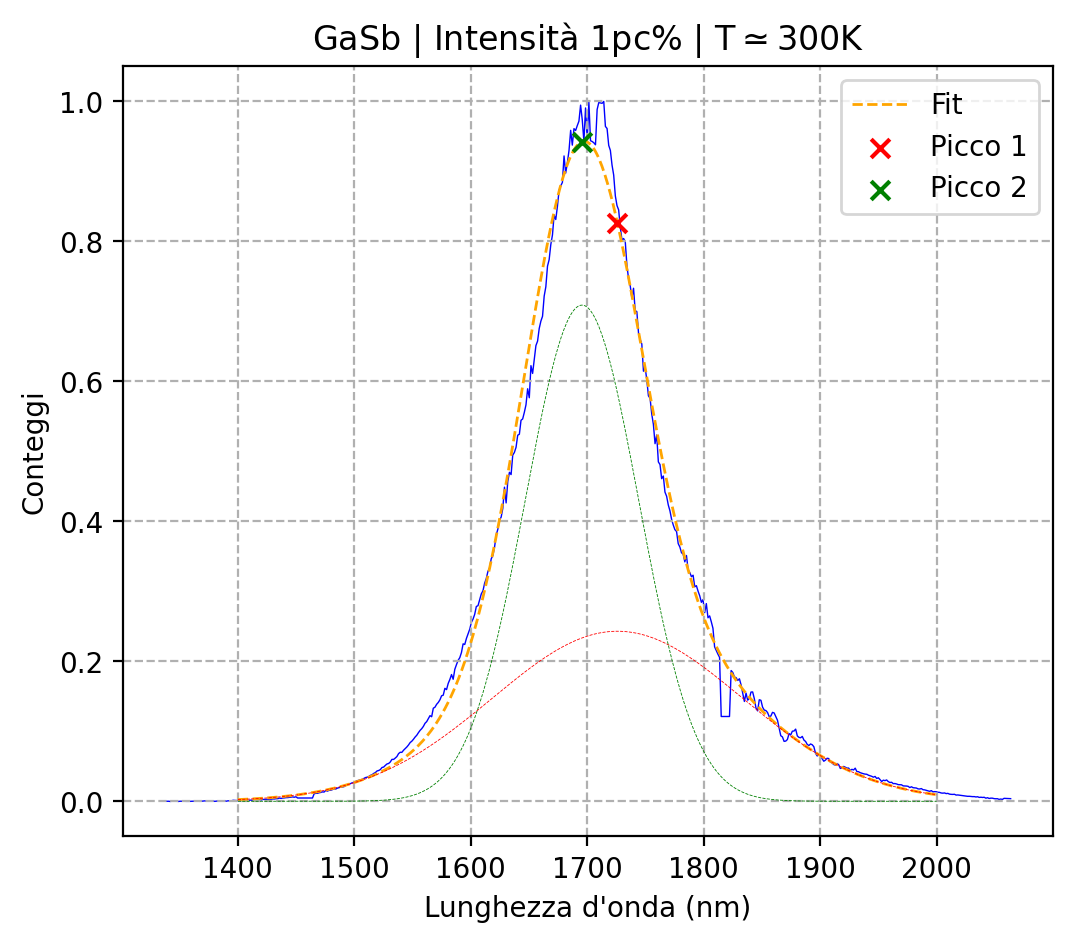

• Gaussiana  1
 - A = 0.24298894116322148
 - mu = 1725.9910181486364
 - sigma = 107.4241094601258
• Gaussiana  2
 - A = 0.7089714502152886
 - mu = 1695.5008364174655
 - sigma = 48.77453442856306
 - chi2rid = 516479.62203691184
SNR = 7626844.126879812


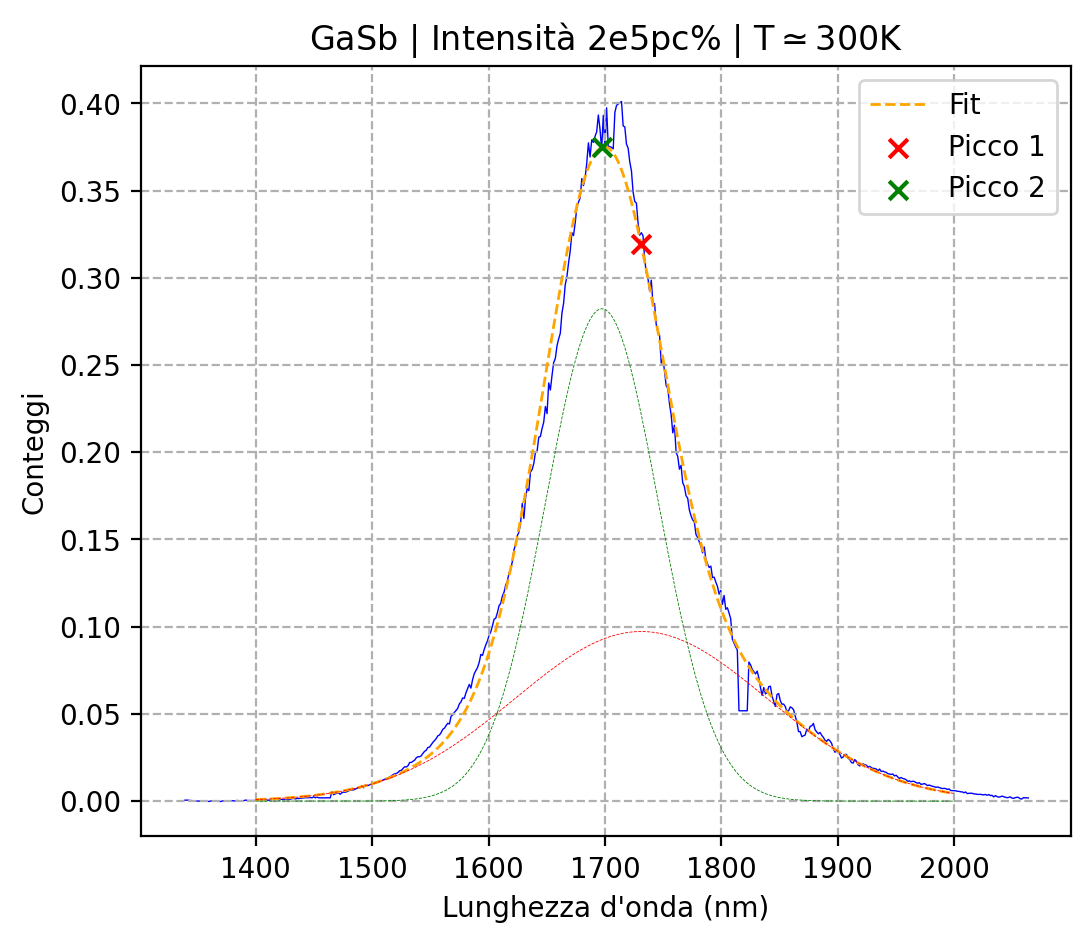

• Gaussiana  1
 - A = 0.09724149671872488
 - mu = 1731.048851863296
 - sigma = 108.0006403887708
• Gaussiana  2
 - A = 0.2822539592639025
 - mu = 1697.4232871049153
 - sigma = 48.530826450257905
 - chi2rid = 190712.26906483987
SNR = 3581325.943328811


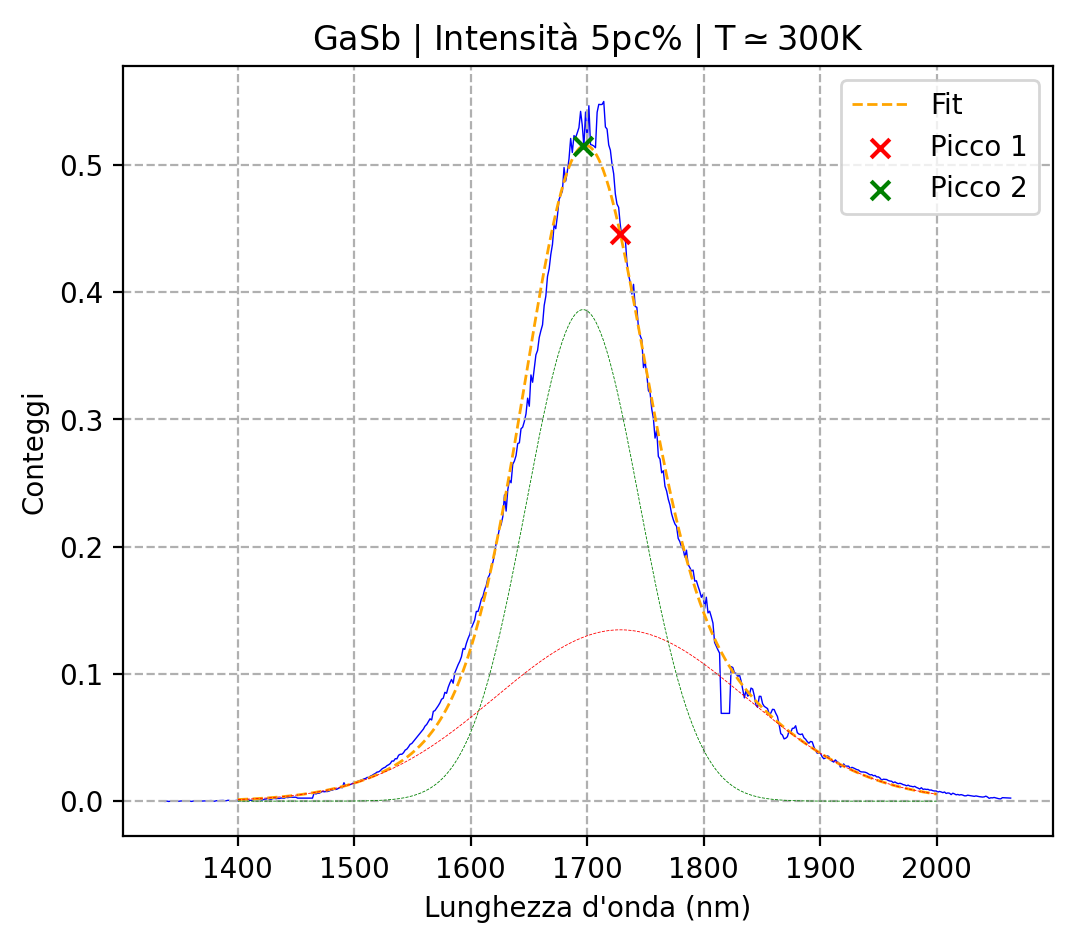

• Gaussiana  1
 - A = 0.13463460982805506
 - mu = 1728.5277134995483
 - sigma = 107.51470776570882
• Gaussiana  2
 - A = 0.38622692684704846
 - mu = 1696.423868034676
 - sigma = 48.68301324697475
 - chi2rid = 282438.4781811505
SNR = 5259102.227392652


In [434]:
for filtro in arr_filtri_GaSb:
    
    waveln = GaSb[filtro][0]
    counts = GaSb[filtro][1]
    dev = rumore[filtro]
    
    ## normalizzo i counts ##
    # creo vettore degli errori sui counts normalizzati (propagando errore)
    counts_sicuro = np.where(counts == 0, 1, counts) 
    # occhio che, essendo traslati, i count possono essere negativi e fare un disastro sotto radice: uso np.abs()
    err_counts = (np.sqrt(np.abs(counts_sicuro))/conteggio_massimo_assoluto) / (np.sqrt(40*n_acq)) 
    # sul massimo count di tutti i plot
    counts = counts_sicuro / conteggio_massimo_assoluto 
    # anche il rumore va normalizzato
    dev = dev / conteggio_massimo_assoluto
    
    ## prendo il massimo dei counts normalizzati per impostare i bounds di A ##
    massimo_locale = np.max(counts)
    low_A = massimo_locale/500
    upp_A = 2*massimo_locale
    init_A = massimo_locale/20
    
    # Plot
    plt.figure(figsize=(6,5), dpi=200)
    plt.plot(waveln, counts, linestyle='-', color='b', linewidth=0.5, zorder=1)
    
    ## FIT ##
    
    # isolo regione 1400 < x < 2000
    mask = (waveln > 1400) & (waveln < 2000)
    x_fit = waveln[mask]
    y_fit = counts[mask]
    err_counts = err_counts[mask]
    
    # impostazione parametri: ogni entrata è una tripla (a, mu, sigma)
    params = [
        (init_A, 1700, 50)
    ]
    
    # Set dei bounds
    low = [low_A, 1500, 1] * len(params)  # Es: A >= 0, mu >= 1500, sigma >= 10
    upp = [upp_A, 1900, 200] * len(params)  # Limiti superiori
    
    popt, pcov, chi2_reduced = fit_N_gaussiane(x_fit, y_fit, params, bounds=(low,upp), N_MAX_GAUSS=2, n_acq=n_acq, err_counts=err_counts, PREVENT_OVERFIT=False)
        
    ## PLOT CURVA FIT ##
    x_plot = np.linspace(1400, 2000, 500)
    y_plot = N_gaussiane(x_plot, *popt)
    plt.plot(x_plot, y_plot, linestyle='--', color='orange', label=f"Fit", linewidth=1, zorder=2)
        
    massimo_picco = 0
    
    # plotto i picchi individuati dal fit
    for i in range(0, round(len(popt)/3)): 
        x_picco = popt[3*i+1]
        # questo dà come ordinata al marker il valore della gaussiana in quella x
        y_picco = N_gaussiane(x_picco, *popt)
        # salvo il picco maggiore di tutti da usare poi come stima del SEGNALE
        if y_picco > massimo_picco:
            massimo_picco = y_picco
        # questo invece gli dà l'ampiezza del picco estratta dal fit (è orribile)
        # y_picco = popt[3*i]
        
        plt.scatter(x_picco, y_picco, 
                    color=col[i], 
                    marker='x',
                    label='Picco '+str(i+1),
                    s=45,
                    zorder=3
                    )
        
    # plotto singolarmente le gaussiane
    for i in range(0, round(len(popt)/3)):
        y_gauss = gaussiana(x_plot, popt[3*i], popt[3*i+1], popt[3*i+2])
        plt.plot(x_plot, y_gauss, linestyle='--', color=col[i], linewidth=0.3, zorder=2)
    
    ## OPZIONI GRAFICHE ##
    plt.title(r'GaSb | Intensità ' + filtro + '% | T$\simeq300$K')
    plt.xlabel("Lunghezza d'onda (nm)")
    plt.ylabel("Conteggi")
    #plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
    plt.legend()
    plt.grid(linestyle='--')
    #plt.tight_layout()
    plt.show()
    
    
    ## PRINT RISULTATI FIT ##
    for i in range(0, round(len(popt)/3)):
        print('• Gaussiana ', i+1)
        print(' - A =', popt[3*i])
        print(' - mu =', popt[3*i+1])
        print(' - sigma =', popt[3*i+2])
    print(' - chi2rid =', chi2_reduced)
    
    ## RAPPORTO SEGNALE/RUMORE (Signal-to-Noise Ratio) ##
    
    # SNR = E[S^2] / E[N^2] -> E[] expected values
    
    # Per ora provo con massimo_picco^2 / dev^2 (dev regione senza picco) 
    SNR = massimo_picco*massimo_locale / (dev*dev)
    print('SNR =', SNR)
    
    lista_SNR.append(SNR)


---

---

# PLOT SNR

Bisogna escludere 0e05 perché i dati sono stati in qualche modo compromessi.

In [435]:
filtri_plot_SNR = []
plot_SNR = []
for i, f in enumerate(arr_filtri_GaSb):
    if i!=2:
        filtri_plot_SNR.append(f)
        plot_SNR.append(lista_SNR[i])

# provo anche a usarlo proprio in percentuale COSÌ NON FUNZIONA! 
perc_filtri_plot_SNR = [0.01, 0.0125, 0.1, 0.5, 1, 2.5, 5]
perc_filtri_plot_SNR_corretta = [0.01, 0.0125, 0.1, 0.5, 2.5, 5, 10]

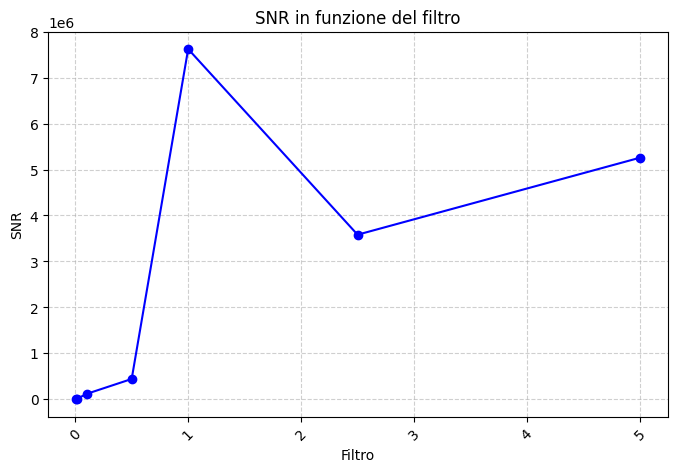

In [436]:
plt.figure(figsize=(8, 5))
plt.plot(perc_filtri_plot_SNR, plot_SNR, marker='o', linestyle='-', color='b')
plt.xticks(rotation=45)
plt.xlabel('Filtro')
plt.ylabel('SNR')
plt.title('SNR in funzione del filtro')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### PROVO SPOSTANDO L'1% ALLA FINE: FORSE ABBIAMO SCAMBIATO IL 10 PER L'1

In [437]:
plot_SNR_corretta = [np.float64(86.43686690329768),
 np.float64(957.3759174461569),
 np.float64(111854.98977791982),
 np.float64(437354.15695959085),
 np.float64(3581325.943328811),
 np.float64(5259102.227392652),
 np.float64(7626844.126879812)]

In [438]:
def radice (x, A, delta_y):
    return A*np.sqrt(x) + delta_y 

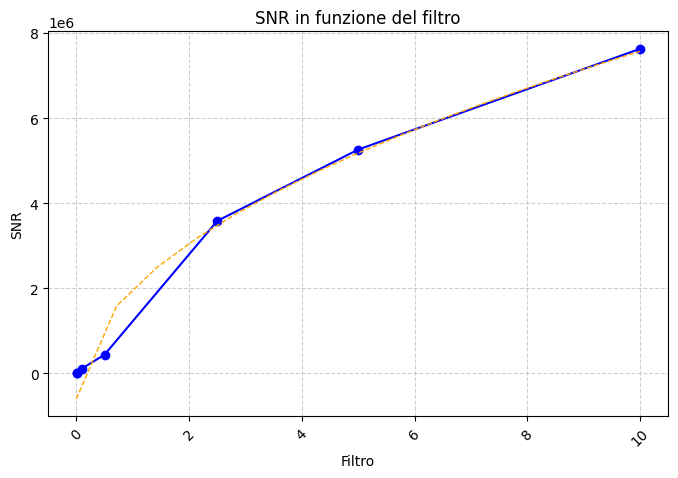

In [443]:
plt.figure(figsize=(8, 5))
plt.plot(perc_filtri_plot_SNR_corretta, plot_SNR_corretta, marker='o', linestyle='-', color='b')


p0 = [1, 0.1]
low = [0, -np.inf]
upp = [np.inf, np.inf]
popt, _ = curve_fit(radice, perc_filtri_plot_SNR_corretta, plot_SNR_corretta,
                    p0=p0, bounds=(low,upp), maxfev=20000)

## PLOT CURVA FIT ##
x_plot = np.linspace(0, 10, 15)
y_plot1 = radice(x_plot, *popt)
plt.plot(x_plot, y_plot1, linestyle='--', color='orange', label=f"Radice", linewidth=1)#, zorder=2)

plt.xticks(rotation=45)
plt.xlabel('Filtro')
plt.ylabel('SNR')
plt.title('SNR in funzione del filtro')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Yessss

# SPIEGAZIONE DEL PERCHÉ